In [1]:
suppressPackageStartupMessages(library(dplyr)) 
library(ggplot2)
library(pheatmap)
suppressPackageStartupMessages(library(Seurat))
suppressPackageStartupMessages(library(Signac))
source("~/scratch/28.FC_16k_Droplet_PT_221210/05.R/DPT_help.R") ### helper code

In [2]:
getwd()
subdir <- "."

[1] "/oasis/tscc/scratch/y2xie/28.FC_16k_Droplet_PT_221210/05.R/Preprocess"

# QC of DNA modality
## Plot Seqeunced reads - FRiP

In [3]:
path <- "/oasis/tscc/scratch/y2xie/28.FC_16k_Droplet_PT_221210/"
frip <- list()
for (s in c("YX794", "YX795", "YX835", "YX836", "YX837", "YX838")){
    frip[[s]] <- ImportArcFRiP(raw_count = paste0(path, "09.macs2/", s, "_clean_fragments.tsv.gz_Count.xls"),
                         frip_count = paste0(path, "09.macs2/", s, "_FRiP_fragments.tsv_Count.xls"))
    frip[[s]]$sample <- s
}

In [4]:
cutoff <- data.frame(sample = c("YX794", "YX795", "YX835", "YX836", "YX837", "YX838"),
                   xcut = c(1200, 1000, 800, 500, 750, 500),
                   ycut = c(0.1, 0.3, 0.05, 0.15, 0.15, 0.35), 
                   ycut2 = c(0.45, 0.95, 0.40, 0.75, 0.55, 0.8))

In [6]:
valid <- list()
for (f in cutoff$sample){
    valid[[f]] <- PlotArcFRiP(frip[[f]], xcut_low = cutoff[cutoff$sample ==f, "xcut"], 
                              ycut_low = cutoff[cutoff$sample ==f, "ycut"], 
                              ycut_high = cutoff[cutoff$sample ==f, "ycut2"], 
                              prefix = f)
}

## CUT&Tag library fragment size distribution

In [ ]:
for (s in cutoff$sample){
    PlotArcFragment(frag_path = paste0("../", s, "/outs/fragments.tsv.gz"), prefix = s)
}

## Correlation with bulk CUT&Tag: FC

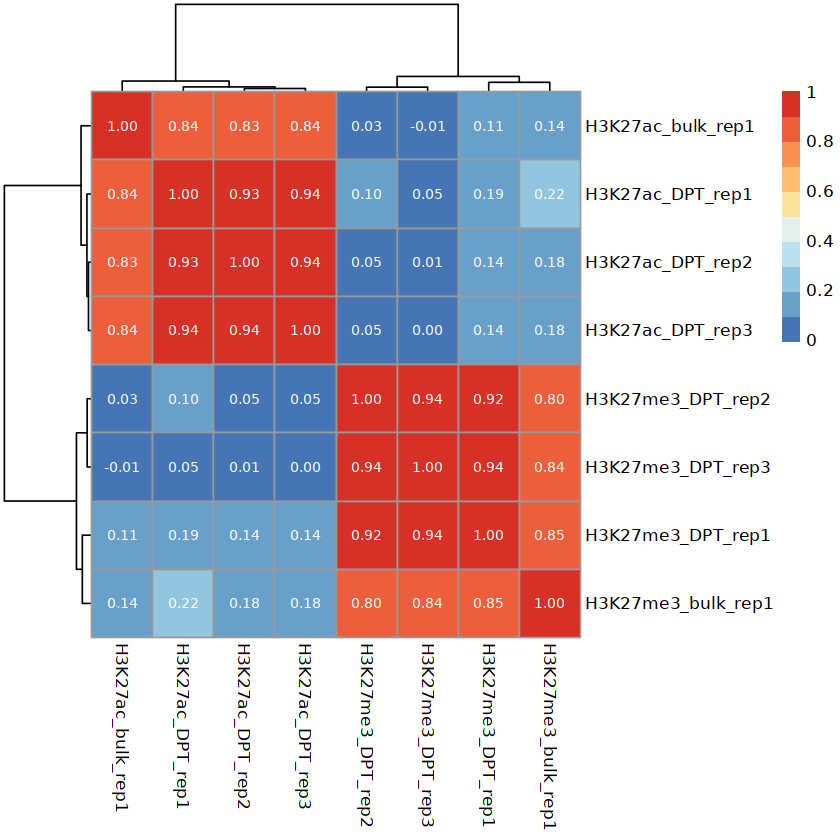

In [11]:
spm <- read.table(paste0(path, "06.bw/FC_H3K27ac_H3K27me3.spearman.txt"))
rownames(spm) <- colnames(spm) <- c("H3K27ac_DPT_rep1", "H3K27ac_DPT_rep2", "H3K27ac_DPT_rep3", 
                                    "H3K27ac_bulk_rep1", "H3K27ac_bulk_rep2", "H3K27me3_DPT_rep2", 
                                    "H3K27me3_DPT_rep3", "H3K27me3_bulk_rep1", "H3K27me3_DPT_rep1")
fig1 <- spm[c(1:3,4,9,6:8), c(1:3,4,9,6:8)] %>%
pheatmap(display_numbers = T, number_color = "white", 
        color = colorRampPalette(rev(brewer.pal(n = 8, name = "RdYlBu")))(10))

## Correlation with bulk ChIP-seq: Excitatry neurons

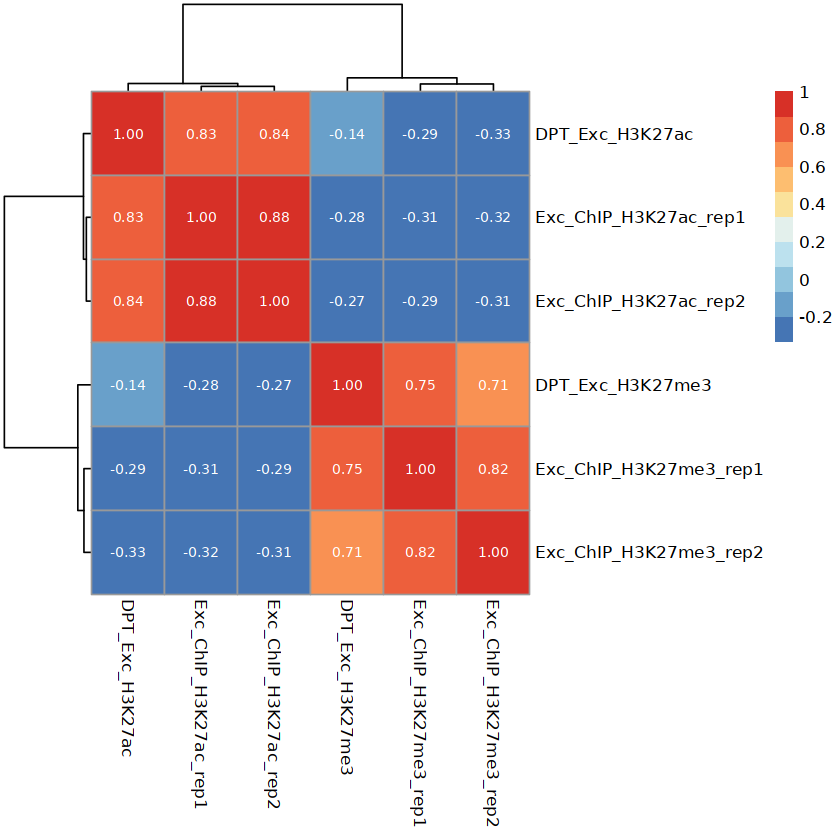

In [13]:
spm <- read.table(paste0(path, "06.bw/FC_ExcNeu_H3K27ac_H3K27me3.spearman.txt"))
rownames(spm) <- colnames(spm) <- c("DPT_Exc_H3K27me3", "Exc_ChIP_H3K27me3_rep1", "Exc_ChIP_H3K27me3_rep2", 
                                    "PT_Exc_H3K27me3", "Exc_ChIP_H3K27ac_rep1", "Exc_ChIP_H3K27ac_rep2", 
                                    "DPT_Exc_H3K27ac", "PT_Exc_H3K27ac")
fig1 <- spm[c(1:3,5:7), c(1:3,5:7)] %>%
pheatmap(display_numbers = T, number_color = "white", 
        color = colorRampPalette(rev(brewer.pal(n = 8, name = "RdYlBu")))(10))